## SUICIDE RATES OVERVİEW 1985 to 2016

### Contents

#### 1.Introduction
#### 2.The Aim of Analysis
#### 3.General View of the Data 
#### 4.Data Cleaning 
#### 5.Data Exploration
#### 6.Conclusions

### 1.Introduction

Suicide is the action of a creature, knowing that its outcome will be death.Risk factors include major depressive disorder, bipolar disorder, schizophrenia, mental disorders such as personality disorders, alcoholism and substance abuse.But , in this data set we will examine gender, age, country, population and etc.Data set includes values from 1985 to 2016.

### 2.The Aim of Analysis

Our aim is to analyze the factors affecting the number of suicides or rates by using the characteristics of the data set.The biggest lack of the data set is the absence of heritage. Many countries such as Asia and Africa, North and South America and Europe are missing.

### 3.Genereal View of the Data

Country:Name of countries

Year:The year in which data is collected

Sex:Female or male

Age:Age of peoples

Suicides No:The number of people who committed suicide that year

Population:Population of the country

Suicides 100k pop:Percentage of suicides

country-year:country and year coloumn

HDI for year:Human development index

gdp for year money:Gross domestic product for year

gdp per capital money:Gross domestic product per capita

generation:Generations of people.

(Before you look at the data, it is useful to know the generational differences. G.I generations were born between 1900-1920.Silent generations were born between 1920-1945 .Boomers generations were born between 1946-1964. X generations were born between 1965-1976. Y generations(millenials) were born between 1977-1995.Z generations were born between 1996-2015.


### Let's have an overview of the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats.mstats import winsorize
 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("master.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### Type of variables

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


categorical variables:Country,sex,age,country-year,gd for year,generation

continuous variables:year,suicides no,population,suicides100kpop,hdı for year,gdp per capita

In [4]:
##Rename the columns to make it easier to work
df=df.rename(columns={'suicides_no':'suicidesNo','suicides/100k pop':'suicides100kPop','HDI for year':'HDIForYear',' gdp_for_year ($) ':'gdpForYearMoney','gdp_per_capita ($)':'gdpPerCapitalMoney'})

In [5]:
df['age'].replace(regex=True,inplace=True,to_replace=r'years',value=r'')

### 4.Data Cleaning

In [6]:
df.isna().sum()*100/df.shape[0]

country                0.000000
year                   0.000000
sex                    0.000000
age                    0.000000
suicidesNo             0.000000
population             0.000000
suicides100kPop        0.000000
country-year           0.000000
HDIForYear            69.935298
gdpForYearMoney        0.000000
gdpPerCapitalMoney     0.000000
generation             0.000000
dtype: float64

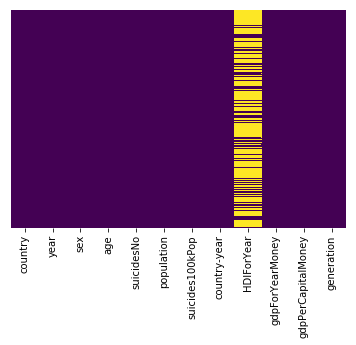

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")
plt.show()

In [8]:
#It contains too many missing values for study.So we need to drop and we dont have to use country-year coloumn.

In [9]:
df.drop(columns=['HDIForYear'],inplace=True)
df.drop(columns=['country-year'],inplace=True)

In [10]:
df["gdpForYearMoney"]=df["gdpForYearMoney"].str.replace(",","").astype("float")

In [11]:
df.head()

,country,year,sex,age,suicidesNo,population,suicides100kPop,gdpForYearMoney,gdpPerCapitalMoney,generation
0,Albania,1987,male,15-24,21,312900,6.71,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54,16,308000,5.19,2.156625e+09,796,Silent
2,Albania,1987,female,15-24,14,289700,4.83,2.156625e+09,796,Generation X
3,Albania,1987,male,75+,1,21800,4.59,2.156625e+09,796,G.I. Generation
4,Albania,1987,male,25-34,9,274300,3.28,2.156625e+09,796,Boomers


### Get rid of outliers

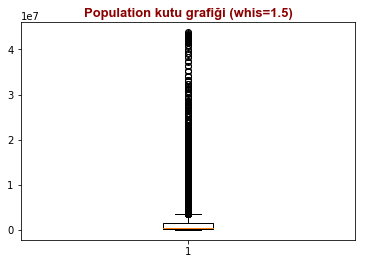

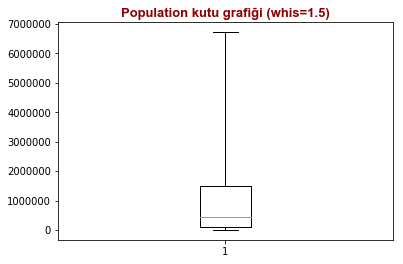

In [12]:
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

plt.boxplot(df["population"],whis=1.5)
plt.title("Population kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

winsorize_population= winsorize(df["population"], (0 , 0.07))

winsorize_population

plt.boxplot(winsorize_population,whis=4)
plt.title("Population kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

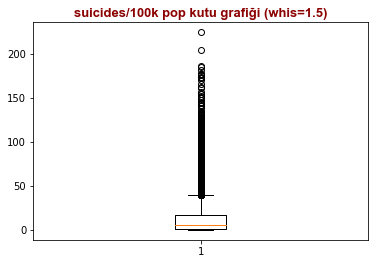

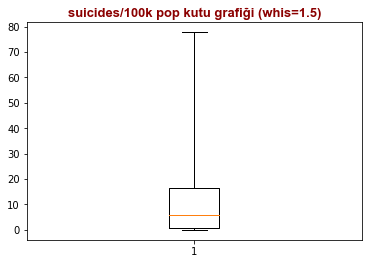

In [13]:
plt.boxplot(df["suicides100kPop"],whis=1.5)
plt.title("suicides/100k pop kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

winsorize_suicides= winsorize(df["suicides100kPop"], (0 , 0.02))

winsorize_suicides

plt.boxplot(winsorize_suicides,whis=4)
plt.title("suicides/100k pop kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

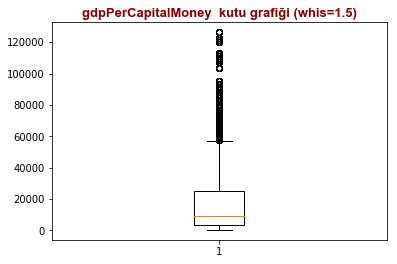

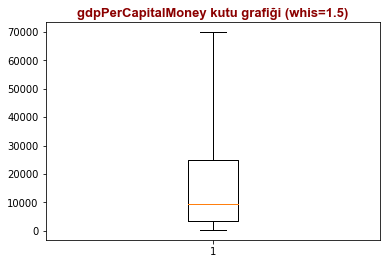

In [14]:
plt.boxplot(df["gdpPerCapitalMoney"],whis=1.5)
plt.title("gdpPerCapitalMoney  kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

winsorize_gdp= winsorize(df["gdpPerCapitalMoney"], (0 , 0.02))

winsorize_gdp

plt.boxplot(winsorize_gdp,whis=4)
plt.title("gdpPerCapitalMoney kutu grafiği (whis=1.5)", fontdict=baslik_font)
plt.show()

### 5.Data Exploration

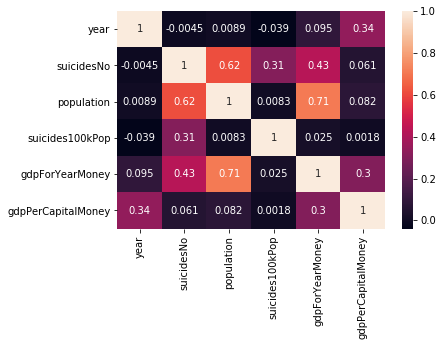

In [15]:
sns.heatmap(df.corr(), annot=True)

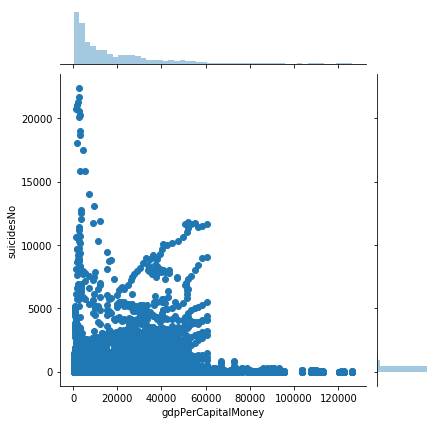

In [16]:
g = snfig=sns.jointplot(y='suicidesNo',x='gdpPerCapitalMoney',data=df)
plt.show()

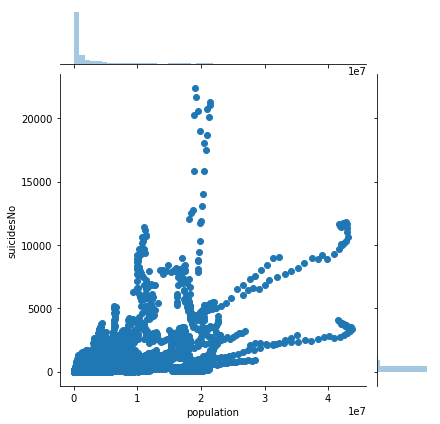

In [17]:
fig=sns.jointplot(y='suicidesNo',x='population',data=df)
plt.show()

In [18]:
suicides_vs_gpd = df[['suicidesNo', 'year', 'gdpForYearMoney',"population",]].groupby('year').mean()
suicides_vs_gpd.reset_index(inplace=True)

suicides_vs_gpd.head()

,year,suicidesNo,gdpForYearMoney,population
0,1985,201.498264,1.926471e+11,1.751042e+06
1,1986,209.496528,2.302251e+11,1.788038e+06
2,1987,195.743827,2.403856e+11,1.689861e+06
3,1988,205.826531,2.985675e+11,1.792678e+06
4,1989,256.801282,3.070805e+11,1.963965e+06


In [19]:
df.groupby('age')['sex'].count()

age
15-24     4642
25-34     4642
35-54     4642
5-14      4610
55-74     4642
75+       4642
Name: sex, dtype: int64

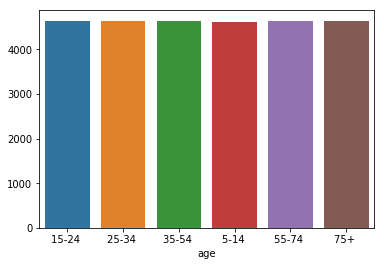

In [20]:
sns.barplot(x=df.groupby('age')['sex'].count().index,y=df.groupby('age')['sex'].count().values)
plt.show()

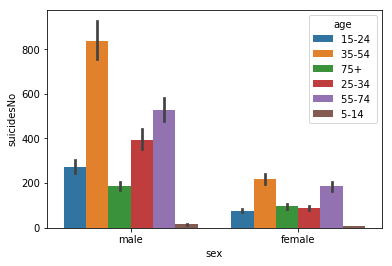

In [21]:
sns.barplot(x='sex', y='suicidesNo', hue='age', data=df)

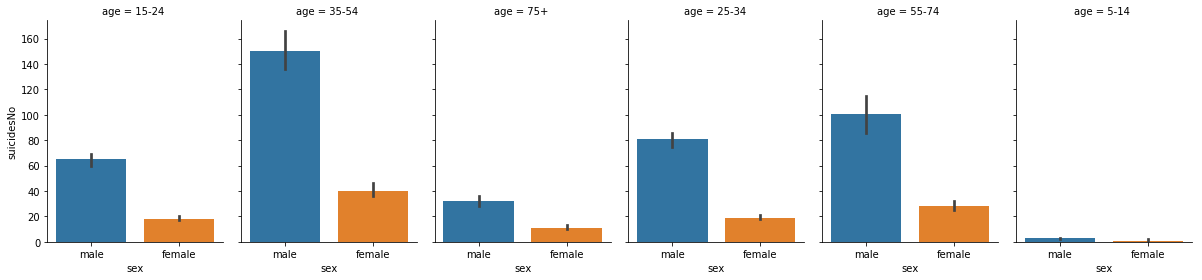

In [22]:
from numpy import median
ax = sns.catplot(x="sex", y="suicidesNo",col='age', data=df, estimator=median,height=4, aspect=.7,kind='bar')

In [23]:
max_suicide_countries=pd.DataFrame(df.groupby(df.country).suicidesNo.sum().nlargest(10))
max_suicide_countries.head()

,suicidesNo
country,
Russian Federation,1209742
United States,1034013
Japan,806902
France,329127
Ukraine,319950


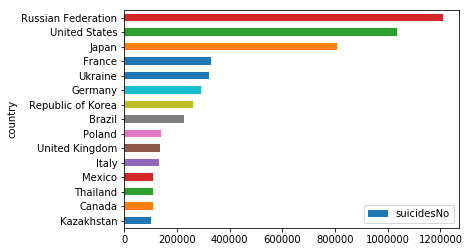

In [24]:
df.groupby(by=['country'])['suicidesNo'].sum().reset_index().sort_values(['suicidesNo'],ascending=True).tail(15).plot(x='country',y='suicidesNo',kind='barh')

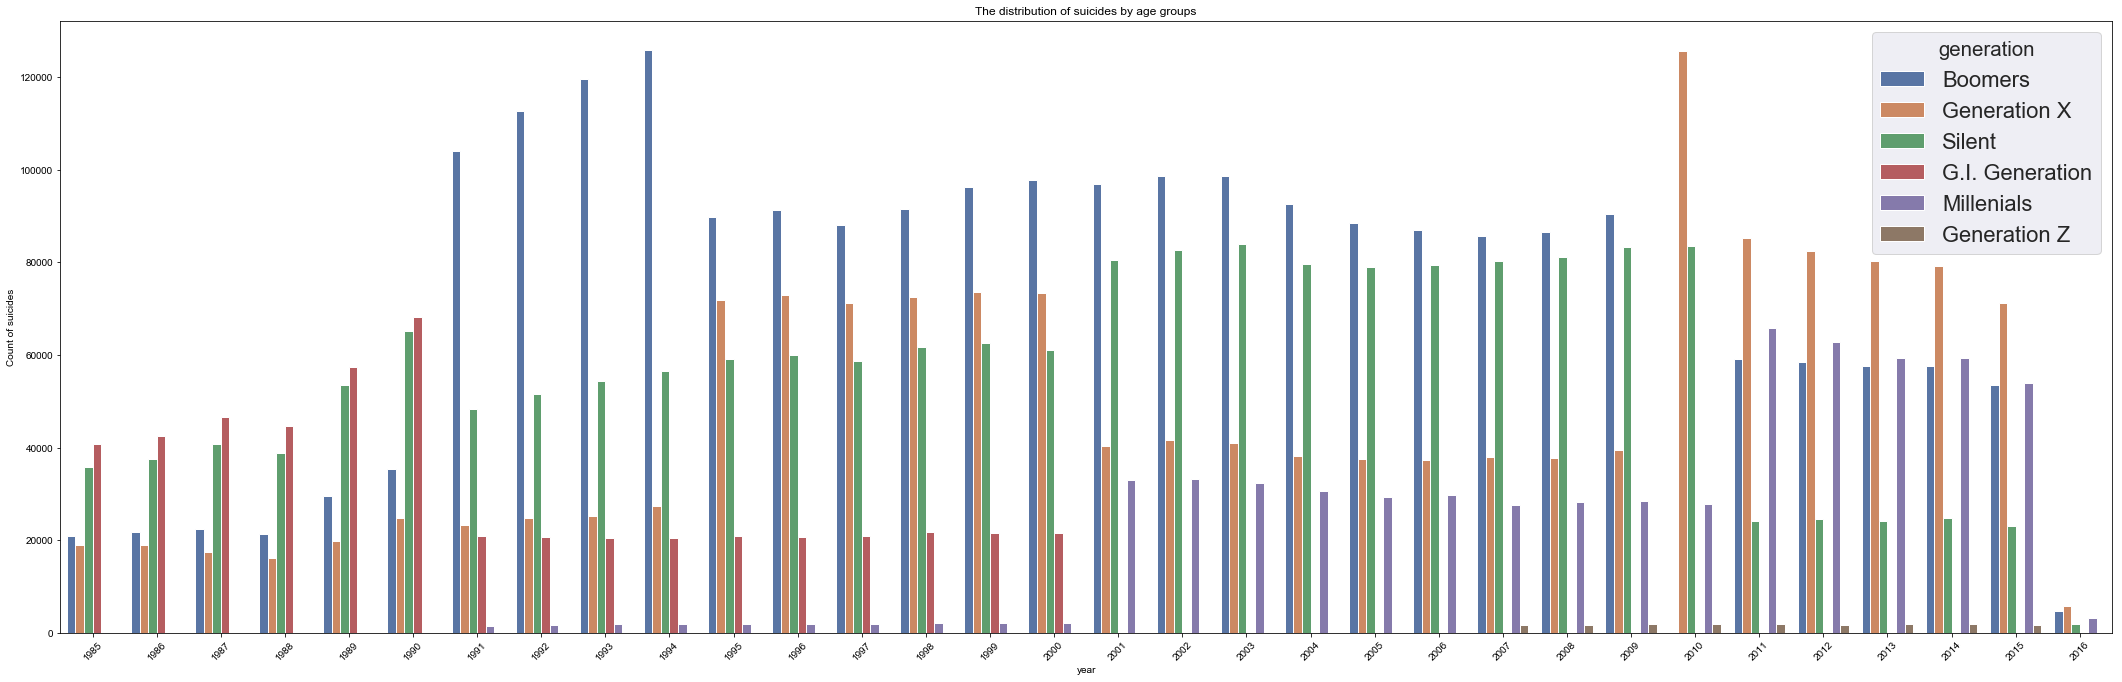

In [25]:
suic_sum = pd.DataFrame(df['suicidesNo'].groupby([df['generation'],df['year']]).sum())
suic_sum = suic_sum.reset_index().sort_index(by='suicidesNo',ascending=False)
most_cont_yr = suic_sum
fig = plt.figure(figsize=(30,10))
plt.title('The distribution of suicides by age groups')

sns.set(font_scale=2)
sns.barplot(y='suicidesNo',x='year',hue='generation',data=most_cont_yr,palette='deep');
plt.ylabel('Count of suicides')
plt.xticks(rotation=45)
plt.tight_layout()

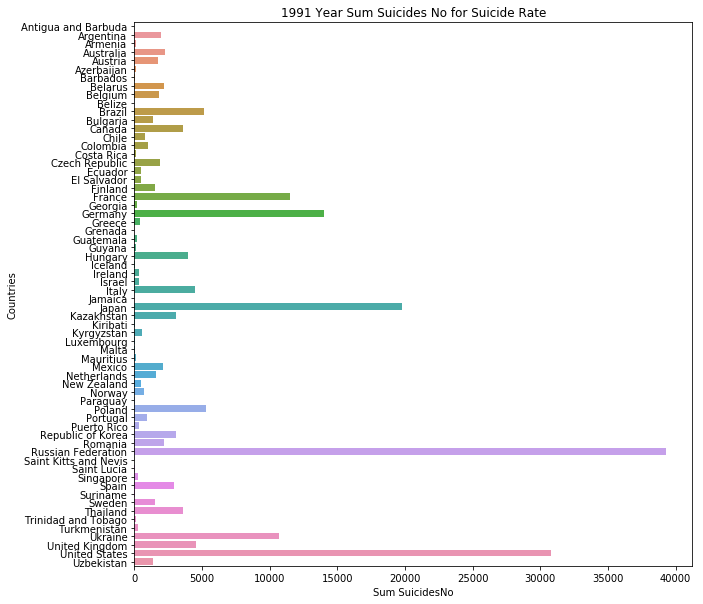

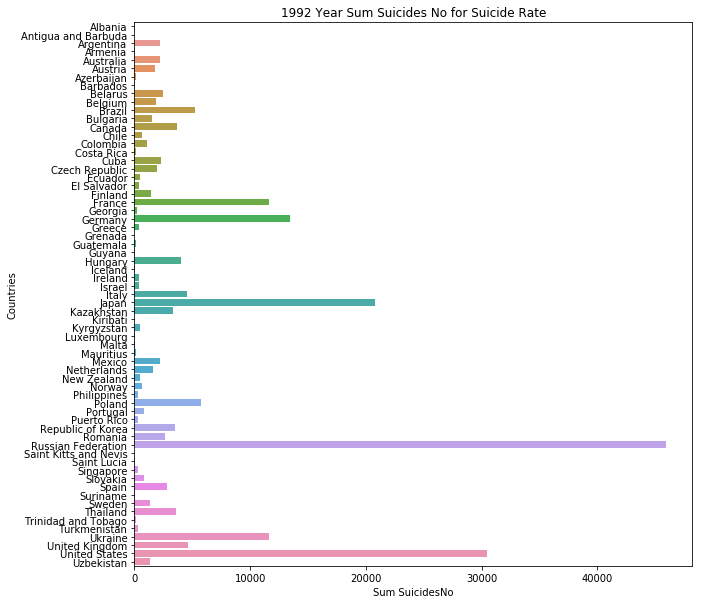

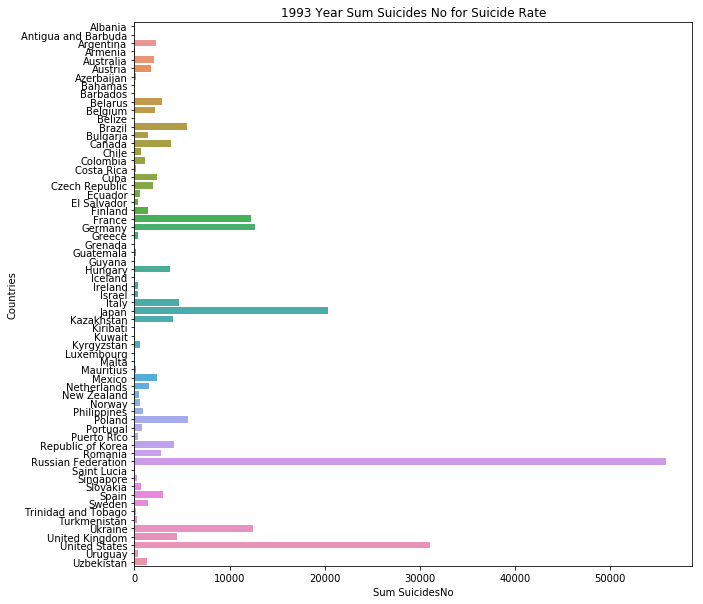

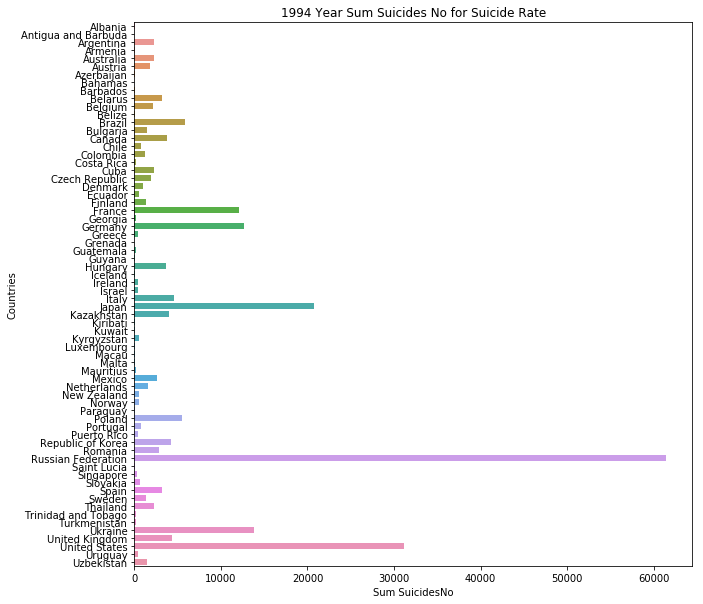

In [25]:
data_country=df[(df['year']==1991)]
country_1991=df[(df['year']==1991)].country.unique()
country_1991_suicidesNo=[]

for country in country_1991:
    country_1991_suicidesNo.append(sum(data_country[(data_country['country']==country)].suicidesNo))    



plt.figure(figsize=(10,10))
sns.barplot(y=country_1991,x=country_1991_suicidesNo)
plt.xlabel('Sum SuicidesNo')
plt.ylabel('Countries')
plt.title('1991 Year Sum Suicides No for Suicide Rate')
plt.show()

#######################################################
data_country=df[(df['year']==1992)]
country_1992=df[(df['year']==1992)].country.unique()
country_1992_suicidesNo=[]

for country in country_1992:
    country_1992_suicidesNo.append(sum(data_country[(data_country['country']==country)].suicidesNo))    



plt.figure(figsize=(10,10))
sns.barplot(y=country_1992,x=country_1992_suicidesNo)
plt.xlabel('Sum SuicidesNo')
plt.ylabel('Countries')
plt.title('1992 Year Sum Suicides No for Suicide Rate')
plt.show()

#######################################################
data_country=df[(df['year']==1993)]
country_1993=df[(df['year']==1993)].country.unique()
country_1993_suicidesNo=[]

for country in country_1993:
    country_1993_suicidesNo.append(sum(data_country[(data_country['country']==country)].suicidesNo))    



plt.figure(figsize=(10,10))
sns.barplot(y=country_1993,x=country_1993_suicidesNo)
plt.xlabel('Sum SuicidesNo')
plt.ylabel('Countries')
plt.title('1993 Year Sum Suicides No for Suicide Rate')
plt.show()

#######################################################
data_country=df[(df['year']==1994)]
country_1994=df[(df['year']==1994)].country.unique()
country_1994_suicidesNo=[]

for country in country_1994:
    country_1994_suicidesNo.append(sum(data_country[(data_country['country']==country)].suicidesNo))    



plt.figure(figsize=(10,10))
sns.barplot(y=country_1994,x=country_1994_suicidesNo)
plt.xlabel('Sum SuicidesNo')
plt.ylabel('Countries')
plt.title('1994 Year Sum Suicides No for Suicide Rate')
plt.show()


#### 1991:Russia coup attempt
#### 1993:Russia constitutional crisis
#### The political, economic and social problems experienced in the post-Soviet period 1990 -1994caused the suicide rates to rise rapidly.

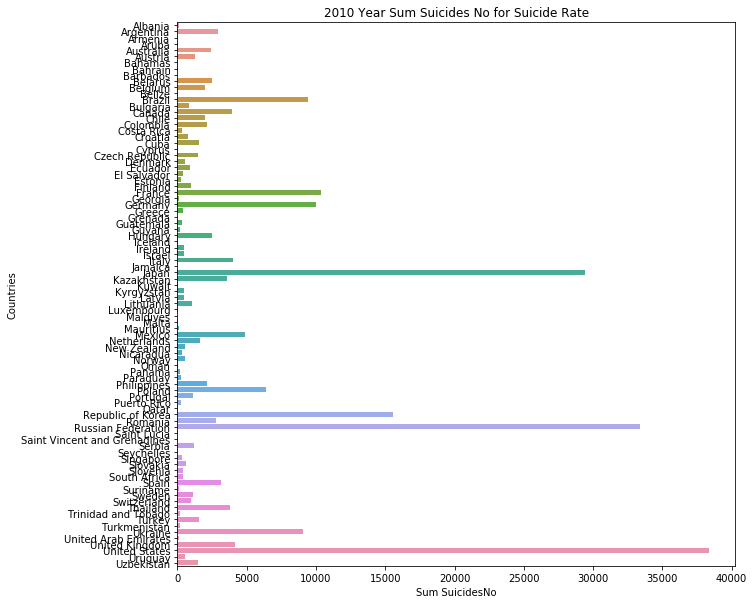

In [26]:
data_country=df[(df['year']==2010)]
country_2010=df[(df['year']==2010)].country.unique()
country_2010_suicidesNo=[]

for country in country_2010:
    country_2010_suicidesNo.append(sum(data_country[(data_country['country']==country)].suicidesNo))    



plt.figure(figsize=(10,10))
sns.barplot(y=country_2010,x=country_2010_suicidesNo)
plt.xlabel('Sum SuicidesNo')
plt.ylabel('Countries')
plt.title('2010 Year Sum Suicides No for Suicide Rate')
plt.show()


#### It turned out that American troops in Afghanistan and Iraq wars committed suicide after returning to their country.

#### According to the report presented to the American Congress, 47% said they had at least one thought of suicide, 40% had attempted suicide, and 31% said they did not intend to live. It is recorded that the problem can not be solved when the soldiers are taken to special therapies because their mental health deteriorates.

#### After the earthquake and tsunami disasters in Japan, many suicides occurred.

#### The sudden increase in adolescent suicides began in February when two 14-year-olds jumped from the top of a building near Moscow in 2010

### 7.Conclusions

There is an equal number of data for all ages except the 5-14 age group so that is a very balanced data set.

As our target variable was suicide count, the relationship between the variables with the highest and lowest correlation was examined. The correlation with the population was 0.62 and the correlation with gdppercapitalmoney  was 0.061. The number of suicides increases as the population increases, but the number of suicides decreases as gdp increases.

If we consider gender as the most suicidal age in men and women 35-54, the minimum age of suicide is 5-14.

The countries with the highest number of suicides are Russia , United States and Japan. 

If we make a general review from 1985 to 2016, there has been an extreme increase outside of normal values for 5 years.

The general reason for the suicides is the economic crises experienced by the countries in those years, coup attempts, war and natural disasters such as the disaster.